HomeWork img_enhance2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter 
from skimage.util import random_noise

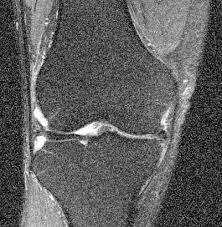

In [2]:
img_mri = cv2.imread('images.jfif')
cv2_imshow(img_mri)

In [3]:
def GLT(image, transform, coeff = 1.0, gamma = 1.0):
  if transform == 'negative' :
    table = np.array([256-1-i for i in np.arange(0,256)]).astype("uint8")

  elif  transform == 'identity' :
    table = np.array([i for i in np.arange(0,256)]).astype("uint8")

  elif  transform == 'log' :
    table = np.array([10*coeff*(np.log10(1+i)) for i in np.arange(0,256)]).astype("uint8")

  elif  transform == 'invlog' :
    table = np.array([10*coeff/(np.log10(1+i)+1) for i in np.arange(0,256)]).astype("uint8")

  elif  transform == 'root' :
    invGamma = 1.0/gamma
    table = np.array([coeff*((i/255.0)**invGamma)*255  for i in np.arange(0,256)]).astype("uint8")

  elif  transform == 'power' :
    table = np.array([coeff*((i/255.0)**gamma)*255  for i in np.arange(0,256)]).astype("uint8")
  
  return cv2.LUT(image, table)
  

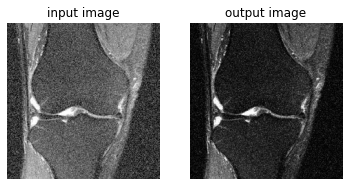

In [4]:
#Gray level Transformation
transform = 'power'
out_img = GLT(img_mri, transform, coeff = 1, gamma = 2.0)
plt.subplot(121)
plt.imshow(img_mri,'gray')
plt.title('input image', fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(out_img,'gray')
plt.title('output image', fontsize=12)
plt.axis("off")
plt.show()

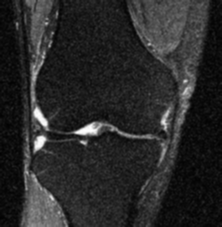

In [59]:
# Load the image in greyscale
img2 = out_img
 
# Apply Gaussian Blur
Gaussian_blurred_1 = np.hstack([
  cv2.GaussianBlur(out_img,(3,3),0)])  
cv2_imshow(Gaussian_blurred_1)

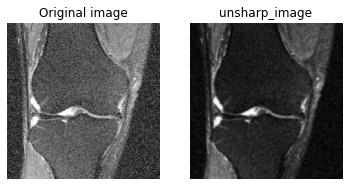

In [67]:
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(Gaussian_blurred_1, 2, Gaussian_blurred_1, -1, 0)

#check Original image and unsharp image 
plt.subplot(121)
plt.imshow(img_mri,'gray')
plt.title('Original image', fontsize=12)
plt.axis("off")


plt.subplot(122)
plt.imshow(unsharp_image,'gray')
plt.title('unsharp_image', fontsize=12)
plt.axis("off")
plt.show()

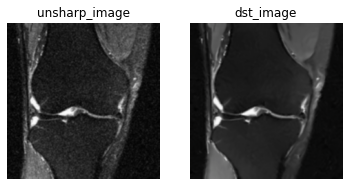

In [61]:
#fastNlMeansDenoisingColored ลด gaussian noise
imgfmd = unsharp_image
dst = cv2.fastNlMeansDenoisingColored(imgfmd,None,10,10,7,21)

plt.subplot(121)
plt.imshow(imgfmd,'gray')
plt.title('unsharp_image', fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('dst_image', fontsize=12)
plt.axis("off")
plt.show()

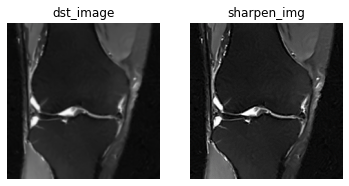

In [62]:
imgdst = dst
# Creating our sharpening filter
filter = np.array([[0, -1, 0],[-1, 5,-1],[0, -1, 0]])
# Applying cv2.filter2D function on our Cybertruck image
sharpen_img=cv2.filter2D(imgdst,-1,filter)

#check Composite Laplacian and unsharp image 
plt.subplot(121)
plt.imshow(dst,'gray')
plt.title('dst_image', fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(sharpen_img,'gray')
plt.title('sharpen_img', fontsize=12)
plt.axis("off")
plt.show()

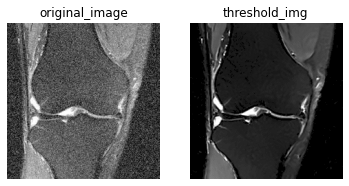

In [69]:
#threshold technique
imgss = cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(imgss, 20, 255, cv2.cv2.THRESH_TOZERO)

#check original_image and sharpen_img
plt.subplot(121)
plt.imshow(img_mri,'gray')
plt.title('original_image', fontsize=12)
plt.axis("off")

plt.subplot(122)
plt.imshow(thresh2,'gray')
plt.title('threshold_img', fontsize=12)
plt.axis("off")
plt.show()

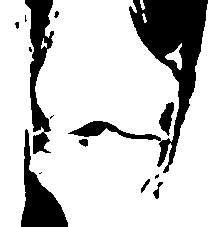

[INFO] otsu's thresholding value: 59.0


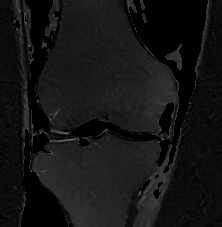

-1

In [38]:
image = sharpen_img

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
cv2_imshow(masked)
cv2.waitKey(0)